# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

### Libraries

In [ ]:
!pip3 install spotipy
!pip3 install pandas
!pip3 install seaborn
!pip3 install tqdm
!pip3 install plotly

### Dependencies and API access

In [1]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm
import plotly.express as px
import plotly.graph_objects as go


client_id = '46b333d567314a89a6254b6c6b054be6'
client_secret = '9d922c3613e441518349dcf55f7d5853'
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [2]:
sns.set_context(context='paper')

### Question: 
### How well do Spotify's audio features represent experimental songs?

- How do Spotify's audio features behave against experimental music? Are they capable of representing what is heard or do they commit mistakes?


### Dataset Construction

First some aux functions

In [3]:
def genres_by_artist_id(id): #id: str
    artist = sp.artist(id)
    genres = artist['genres']
    return genres    #genres: List[str]

def songs_from_album_id(album_id):
    songs = []
    album = sp.album(album_id)
    artist = album['artists'][0]['name']
    for item in album['tracks']['items']:
        track = {}
        track["song_name"] = item['name']
        track["song_id"] = item['id']
        track["album_name"] = album['name']
        track["album_id"] = album["id"]
        audio_features = sp.audio_features(track["song_id"])
        track["audio_features"] = audio_features[0]
        track["artist"] = artist
        songs.append(track)
    return songs    #songs:List[dict]

def add_track(track_id, songs): #track_id:str, songs:List[dict]
    track = sp.track(track_id)
    audio_features = sp.audio_features(track_id)
    row = {}
    row["song_name"] = track['name']
    row["song_id"] = track['id']
    row["album_name"] = track['album']['name']
    row["album_id"] = track['album']['id']
    row["audio_features"] = audio_features[0]
    songs.append(row)
    return songs



First we handpick some experimental songs.

Song list: mother of the world, 30 red houses, Hunting down individual mosquitoes, 
            Oral couture, Turbo Olé, Ceaseless Suffering, 
            The Wolf, Aorta, Declare Independence,
            sin rumbo, Anger, Soichiro,
            No Love, Hunger Games, Double Helix,
            Hacker, Black paint, Visceras,
            Micro, 1 hour white noise, Peg,
            Alice, Woodpecker No 1, Tokyo times ten,
            Data.Duplex, Data.Syntax, 5 movements for string quartet, op.5: 1.heftig bewegt,
            Pierrot Lunaire, Op. 21:VIII. Die Nacht, Metastaseis, Horses,
            Heavy Water/I'd rather be sleeping
            

In [4]:
select_dataset = []
select_tracks = ["5zNQPB67iLm11Zyg6hwiQX","1X8VjdoPONsFDepJcmvz3E","26pTHO6oeJwjacJFhDzqVl",
          "6ZzpYaAQVvRKwFtMej9OEM","5ecFLLkXuMdZgLYihUfFGk", "2eL3QVjeJF9KhpYkVxjLUA",
          "1YJ264vuusaeDpbe8BKpBP", "0UxLfXmjXU5qoRFL25n5lA", "7gy9d7iBHW9BWhMNPjHuFf",
          "0aL27vskbMpwsMGUkHm3Zf", "1QofoyawKCfWd5lZXwE02k", "4zsfqkM7X1ZYcMAXpGkOO5",
          "5fDj1YVNR04RtQNP4iYapO", "3Pt8XN6zWFmW2ShLna8Ttb", "2SWHZzjaqBuWYUUuxjdeBG",
          "7y8X0Z04gJCKtfrnSAMywJ", "2yY0LXGpN7U2y5tbagNnXq", "1IDi1OjPT8y7MmNflRYMHO",
          "32IPwbBBWJzubJAAZeVx0x", "7Ipe9FfRceDN51YMyd99pO", "2DYxoQbcgjuduAYb98SVLj",
          "7n6WNQidHGzHm0TQHWV7aH", "4UO1pfxi5fDbxshrwwznJ2", "2GgN9rZOpMMGoGVxK9jRxf",
          "6f41Dmik9o6ByGCCe6AJR1", "1C811u2Eqsp6IWki8HyIJC", "5xFWfrJXy7WLdNrioyjUmt",
          "7oTjhU3qCmmXxGR3zi5H2L", "1efDBHuz4k6Zei6chsAwfq", "3e20AQb9sMo23KokSqBrBY",
          "6IUwiHsyKAZtfBy37Wu4ij",
         ]
for track in tqdm.tqdm(select_tracks):
    add_track(track,select_dataset)

100%|██████████| 31/31 [00:15<00:00,  1.98it/s]


Our dataset will be built from this selection of tracks. We add all tracks of the selected tracks' albums.

In [5]:
tracks = []
for song in tqdm.tqdm(select_dataset):
    tracks += songs_from_album_id(song['album_id'])


100%|██████████| 31/31 [01:50<00:00,  3.55s/it]


We build the base dataframes

In [6]:
songs = pd.DataFrame(tracks)
audio_features_base = pd.DataFrame(list(songs["audio_features"].values))

### With that on hand, let's see how the artists are distributed on our dataset

<Figure size 1080x432 with 0 Axes>

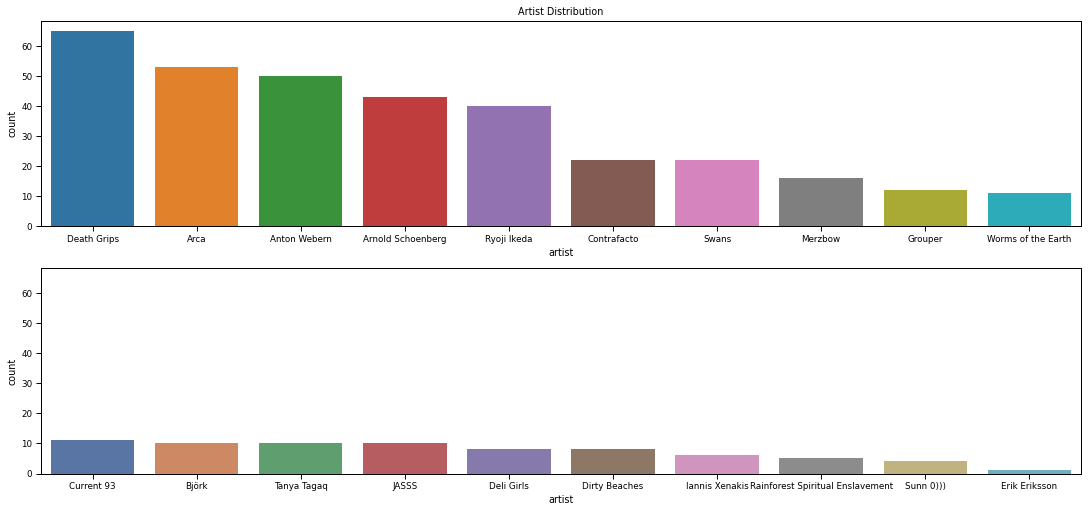

In [7]:
artist_counts = songs.artist.value_counts()
artist_counts_df = pd.DataFrame({'artist':artist_counts.index,'count':artist_counts.values})
plt.figure(figsize=(15, 6))
fig, ax =plt.subplots(2,1,constrained_layout=True, figsize=(15,7),sharey=True)
sns.barplot(x = 'artist', y ='count', ax=ax[0],data=artist_counts_df.head(10))
ax[0].set_title("Artist Distribution")
sns.barplot(x = 'artist', y ='count', ax=ax[1],data=artist_counts_df.tail(10),palette="deep")

In [8]:
description_base = audio_features_base.describe()
description_base

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
count,407.000000,407.000000,4.070000e+02,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.430762,0.382514,2.644464e+05,0.489696,0.383935,5.159705,0.211270,-15.683585,0.631450,0.119341,114.136197,3.756757,0.224584
std,0.399115,0.189975,2.914635e+05,0.346484,0.398867,3.716764,0.176916,11.696782,0.483005,0.120746,35.433945,0.849397,0.207839
min,0.000001,0.000000,1.436000e+04,0.000066,0.000000,0.000000,0.037300,-47.435000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.029400,0.231000,1.325000e+05,0.142000,0.000065,1.000000,0.101000,-23.643500,0.000000,0.041950,85.672000,4.000000,0.055350
50%,0.303000,0.364000,2.011740e+05,0.534000,0.206000,5.000000,0.128000,-11.717000,1.000000,0.058500,111.294000,4.000000,0.154000
75%,0.893500,0.546000,2.880010e+05,0.811000,0.823000,9.000000,0.275000,-6.592000,1.000000,0.155000,138.404500,4.000000,0.369000
max,0.995000,0.924000,3.631718e+06,1.000000,1.000000,11.000000,0.934000,5.118000,1.000000,0.810000,203.224000,5.000000,0.983000


From the available features to analyse, I chose the following (quoted phrases from [spotify's documentation](https://developer.spotify.com/documentation/web-api/reference/tracks/get-several-audio-features/)):

- **energy**: [float] "Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy."

- **valence**: [float] "A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry)."

- **danceability**: [float] "Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable." That means we can interpret danceability as **regularity** in the context of experimental music.

- **instrumentalness**: [float] "Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0."

- **speechiness**: [float] "Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks."

In [9]:
features = ["speechiness", "instrumentalness", "danceability", "valence", "energy"]

## We calculate the ranges of the audio features

In [10]:
ranges_base = pd.concat([pd.DataFrame(description_base.loc['max']),pd.DataFrame(description_base.loc['min'])],axis=1)
ranges_base

,max,min
acousticness,0.995,0.000001
danceability,0.924,0.000000
duration_ms,3631718.000,14360.000000
energy,1.000,0.000066
instrumentalness,1.000,0.000000
key,11.000,0.000000
liveness,0.934,0.037300
loudness,5.118,-47.435000
mode,1.000,0.000000
speechiness,0.810,0.000000


Let's keep the features we will analyse only

In [11]:
audio_features = audio_features_base[features]
ranges = ranges_base.loc[features]
description = description_base[features]
description

,speechiness,instrumentalness,danceability,valence,energy
count,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.119341,0.383935,0.382514,0.224584,0.489696
std,0.120746,0.398867,0.189975,0.207839,0.346484
min,0.000000,0.000000,0.000000,0.000000,0.000066
25%,0.041950,0.000065,0.231000,0.055350,0.142000
50%,0.058500,0.206000,0.364000,0.154000,0.534000
75%,0.155000,0.823000,0.546000,0.369000,0.811000
max,0.810000,1.000000,0.924000,0.983000,1.000000


In [12]:
#more aux functions
def track_by_feature(feature, value):
    track_id = audio_features_base[audio_features_base[feature]==value]['id']
    track_id = track_id.values.item(0)
    return songs[songs['song_id']== track_id]
#example use: 
#track_by_feature("acousticness",0.950000)
#track_by_feature("liveness",0.041200)

def songs_of_description(statistic):
    row = description.loc[statistic]
    keys = row.keys()
    tracks_of_row = []
    for key in keys:
        track = track_by_feature(key,row[key]).to_dict()['song_name']
        track = list(track.values())[0]
        tracks_of_row.append({key: track})
    return tracks_of_row


Let's see which songs had the hightest and the lowest scores

In [13]:
songs_of_description("min")

[{'speechiness': '5 Pieces For Orchestra: 1. Bewegt'},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': '5 Pieces For Orchestra: 1. Bewegt'},
 {'valence': '5 Pieces For Orchestra: 1. Bewegt'},
 {'energy': 'White Noise 1 Hour Long'}]

In [14]:
songs_of_description("max")

[{'speechiness': 'Here We Go Again'},
 {'instrumentalness': 'White Noise 1 Hour Long'},
 {'danceability': 'Money'},
 {'valence': 'True Blue'},
 {'energy': 'Woodpecker No. 2'}]

## Distribution of the songs' features

<Figure size 1080x720 with 0 Axes>

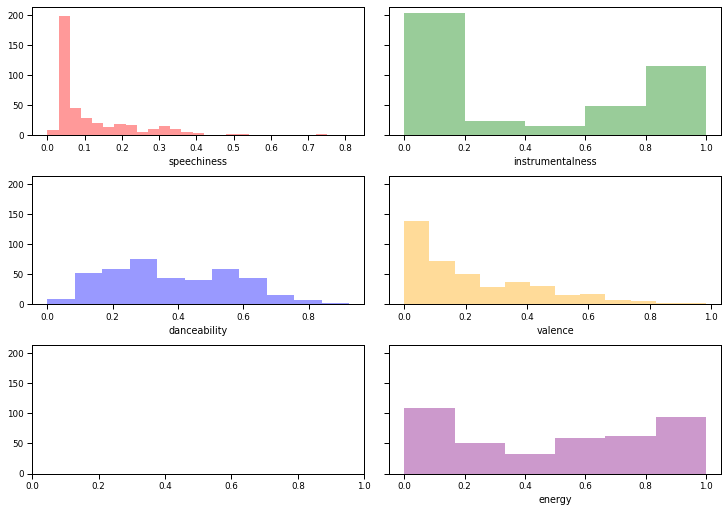

In [51]:
plt.figure(figsize=(15, 10))
fig, ax =plt.subplots(3,2,constrained_layout=True, figsize=(10,7),sharey=True)
sns.distplot(audio_features["speechiness"],ax=ax[0,0],color="red", kde=False, norm_hist=False)
sns.distplot(audio_features["instrumentalness"],ax=ax[0,1],color="green", kde=False, norm_hist=False)
sns.distplot(audio_features["danceability"],ax=ax[1,0],color="blue", kde=False, norm_hist=False)
sns.distplot(audio_features["valence"],ax=ax[1,1],color="orange", kde=False, norm_hist=False)
sns.distplot(audio_features["energy"],ax=ax[2,1],color="purple", kde=False, norm_hist=False)

We can see that given a random song of the dataset, there's a high probability that the song:
* will not be considered **speechy** by spotify, its low value meaning it won't be music predominently vocal (like rap, etc) nor speech recordings, but a musical track.
* there's a 50/50 probability of the song to be considered **instrumental** or not;
* it will rank above average in the **danceability** score, meaning it's probably considered as rhythmically stable, with strong beats and present an overall regularity;
* will rank low on the **valence** score, meaning spotify classifies it as sad/depressive/negative;
* its **energy** will be catalogued as high, meaning it is probably entropic and loud for Spotify.

In [16]:
#more aux funcs
def audio_by_artist(artist_name):
    artist = songs[songs["artist"]==artist_name]
    artist_audio = pd.DataFrame(list(artist.audio_features.values))
    return artist_audio

def dist_by_artist(artist_name):
    artist = songs[songs["artist"]==artist_name]
    artist_audio = pd.DataFrame(list(artist.audio_features.values))

    plt.figure(figsize=(15, 10))
    fig, ax =plt.subplots(3,2,constrained_layout=True, figsize=(10,7),sharey=True)
    sns.distplot(artist_audio["speechiness"],ax=ax[0,0],color="red", kde=False, norm_hist=False)
    sns.distplot(artist_audio["instrumentalness"],ax=ax[0,1],color="green", kde=False, norm_hist=False)
    sns.distplot(artist_audio["danceability"],ax=ax[1,0],color="blue", kde=False, norm_hist=False)
    sns.distplot(artist_audio["valence"],ax=ax[1,1],color="orange", kde=False, norm_hist=False)
    sns.distplot(artist_audio["energy"],ax=ax[2,1],color="yellow", kde=False, norm_hist=False)
    return artist_audio

def make_radar(artist_name):
    artist_audio = audio_by_artist(artist_name)
    artist_desc = artist_audio[features].describe()
    artist_means = list(artist_desc.loc["mean"])
    df = pd.DataFrame(dict(
        r=artist_means,
        theta=features,
        artist=artist_name))
    fig = px.line_polar(df, r='r', theta='theta', line_close=True,hover_name=df.artist)
    return fig

def radar_from_df(df, artist_name):
    artist_desc = df[features].describe()
    artist_means = list(artist_desc.loc["mean"])
    df2 = pd.DataFrame(dict(
        r=artist_means,
        theta=features,
        artist=artist_name))
    fig = px.line_polar(df2, r='r', theta='theta', line_close=True,hover_name=df2.artist)
    return fig

# Report

### Question: How well do Spotify's audio features represent experimental songs' characteristics?

- How do these features behave against experimental music? 
- Are Spotify's audio features capable of describing experimental music? Do they make mistakes? Are they meaningful?

In order to investigate this, I made an initial, small dataset with 31 handpicked songs, which I knew before hand and would expect to be challenging for any cataloguer; they represent different types of sound experimentation.
In this dataset there are songs like:

* White noise
* Dodecaphonic and Serialist music,
* Noise and Harsh Noise,
* indie,
* drone, avant-garde metal, atmospheric black metal,
* Predominantly vocal music, throat singing,
* experimental electronic,
* art pop, Experimental pop,
* synth punk,
* Minimal music,
* Ambient.

With that as a base I made a final dataset, with **407 songs**, using the songs belonging to the albums of the tracks of the smaller dataset.
The artists' distribution in the dataset was plotted in previous analysis, but as a reminder:

In [17]:
artist_counts

Death Grips                         65
Arca                                53
Anton Webern                        50
Arnold Schoenberg                   43
Ryoji Ikeda                         40
Contrafacto                         22
Swans                               22
Merzbow                             16
Grouper                             12
Worms of the Earth                  11
Current 93                          11
Björk                               10
Tanya Tagaq                         10
JASSS                               10
Deli Girls                           8
Dirty Beaches                        8
Iannis Xenakis                       6
Rainforest Spiritual Enslavement     5
Sunn 0)))                            4
Erik Eriksson                        1
Name: artist, dtype: int64

## Features

From the audio features that Spotify provides us through the API, I chose to focus on

- speechiness
- instrumentalness
- danceability
- valence
- energy

since they seemed like the most subjective to me, specially in the case of non-mainstream music; 

* What would Danceability mean for a dodecaphonic piece? 

* What is the Valence of a minimal song? 

* What is the Energy of a noise song? 

* the Instrumentalness of voice sampling? 

* Speechiness of throat singing?

Based on this large, base dataset I calculated the mean of the chosen features across the tracks in the dataset. Based on that I investigated this dataset's performance with radar charts. 

## Qualititative Analysis

The questions I have made correspond more to a qualitative analysis than a quantitative analysis. They also involve a case by case type of analysis, since they mean listening to the songs and trying to make sense of the features' values.

In [18]:
audio_features_base.describe()[features]

,speechiness,instrumentalness,danceability,valence,energy
count,407.000000,407.000000,407.000000,407.000000,407.000000
mean,0.119341,0.383935,0.382514,0.224584,0.489696
std,0.120746,0.398867,0.189975,0.207839,0.346484
min,0.000000,0.000000,0.000000,0.000000,0.000066
25%,0.041950,0.000065,0.231000,0.055350,0.142000
50%,0.058500,0.206000,0.364000,0.154000,0.534000
75%,0.155000,0.823000,0.546000,0.369000,0.811000
max,0.810000,1.000000,0.924000,0.983000,1.000000


### Global Minimums Analysis

In [19]:
songs_of_description("min")

[{'speechiness': '5 Pieces For Orchestra: 1. Bewegt'},
 {'instrumentalness': '30 Red Houses'},
 {'danceability': '5 Pieces For Orchestra: 1. Bewegt'},
 {'valence': '5 Pieces For Orchestra: 1. Bewegt'},
 {'energy': 'White Noise 1 Hour Long'}]

Anton Webern's **"5 Pieces For Orchestra: 1. Bewegt"** represented a minimum for 3 out of 5 features.
This short dodecaphonic, atonal piece has the lowest scores for **speechiness, danceability and valence**, all three having a score of zero. This piece last two features' performance interestly correspond with mainstream perception of dodecaphonic music. Even if no somber, dark undertones are originally intented, its formal guidelines for writing music are easily interpreted as such by public ears'. Its unique take on tempo and key correspond to atonality's expressive interest, presenting innovative forms of regularities. Spotify measures this through the "danceability" feature.

In [52]:
print("Webern's scores")
webern_bewegt = pd.DataFrame(list(track_by_feature("valence",0.000000)["audio_features"].values))[features]
webern_bewegt

Webern's scores


,speechiness,instrumentalness,danceability,valence,energy
0,0,0.026,0,0,0.0048


### Observation: low instrumentalness for an instrumental piece
This track's instrumentalness score is very low, meaning Spotify can't say with confidence that the song contains no vocal tracks. The piece is purely instrumental, so this is an example of an objectivly bad performance of Spotify's audio features.

### Observation: low speechiness and low instrumentalness equals ?
At the same time, Spotify scores this track its lowest possible on speechiness. What would it mean for a song to contain neither vocal tracks nor instrumental parts? An empty recording maybe? This piece is clearly not an empty recording, so even if the speechiness score is technically correct, the pieces's audio features as a whole don't make much sense.

In [21]:
webern_popularity = sp.track("41EthquhsktiXzkDjzlyA6")['popularity']
print("Webern's 5 pieces for orchestra's Bewegt popularity :", webern_popularity)

Webern's 5 pieces for orchestra's Bewegt popularity : 2


It's of interest to compare Webern's performance against a pure **White Noise** recording.

In [22]:
white_noise = audio_features_base[audio_features_base["uri"]=="spotify:track:7Ipe9FfRceDN51YMyd99pO"][features]
white_noise

,speechiness,instrumentalness,danceability,valence,energy
219,0.143,1.0,0.124,0.00001,0.000066


For Spotify, 1 hour of pure white noise is more "danceable" (regular) than the minute long atonal track.

It's worth noting that spotify can say with confidence that this white noise recording contains no vocals, and its mostly "instrumental" in that sense. This is correct.

In [23]:
white_noise_popularity = sp.track("00DVtdi8lE9em4GdOADTvH")['popularity']
print("White noise popularity: ",white_noise_popularity)

White noise popularity:  29


In [63]:
fig = make_radar("Erik Eriksson")
fig.update_layout(title='Atonal(Webern) vs White Noise(Eriksson)')
fig2 = make_radar("Anton Webern")
fig.add_trace(fig2.data[0])
fig.show()

**Energy**'s minimum score is hold by this white noise recording.

**Instrumentalness**'s minumim score is hold by Current 93's **30 red horses**, a track featuring at center plane  vocal performance, so this score seems correct.

### Global Maximums Analysis

In [25]:
values = pd.DataFrame(audio_features_base.describe()[features].loc['max'])
print(values)
songs_of_description("max")

                    max
speechiness       0.810
instrumentalness  1.000
danceability      0.924
valence           0.983
energy            1.000


[{'speechiness': 'Here We Go Again'},
 {'instrumentalness': 'White Noise 1 Hour Long'},
 {'danceability': 'Money'},
 {'valence': 'True Blue'},
 {'energy': 'Woodpecker No. 2'}]

**Speechiness'** and **Danceability's** maximums are from the synth punk band Deli Girls.

### Observation: high speechiness for a musical track
**Speechiness** maximum value is for the song **Here we go again**. This synth rich track samples and remixes vocals in the style of slam poetry, shouting and moans. For Spotify, this is a speech-based recording with 0.81 of confidence. According to the API's reference *values above 0.66 describe tracks that are probably made entirely of spoken words* so it fails to recognize the track as a musical piece, giving it a score a podcast or a poetry recording would have.

**Danceability**'s maximum is recorded for **Money**, a track of the same album. A high energy song with a very regular, strong beat, so the score seems fitting.


In [26]:
speech_max_deli = pd.DataFrame(list(track_by_feature("speechiness",0.810000)["audio_features"].values))[features]
dance_max_deli =pd.DataFrame(list(track_by_feature("danceability",0.924000)["audio_features"].values))[features]
print(speech_max_deli)
dance_max_deli

   speechiness  instrumentalness  danceability  valence  energy
0         0.81          0.000031         0.499    0.198   0.868


,speechiness,instrumentalness,danceability,valence,energy
0,0.266,0.000033,0.924,0.468,0.897


In [53]:
deli_popularity_1 = sp.track("0FX1zZLU09Z2yyEJfZ2zNw")['popularity']
deli_popularity_2 = sp.track("534OSh0L86TmtnieOzXpaU")['popularity']
print("Deli Girls' songs' popularities: ",deli_popularity_1,",", deli_popularity_2)

Deli Girls' songs' popularities:  19 , 15


### Observation: Maximum valence for a distorted nostalgic song
Maximum **valence** is achieved by Dirty Beache's **True blue**, with a 0.98300 score. A nostalgic, dreamy take on old time sad rock ballads. Doesn't really fit with a score that high, when a high score is supposed to represent a song that is cheerful/happy. Its valence score is higher than some sickly positive songs, like **Fireworks** by Katy Perry or **Starships** by Nicki Minaj. It scores even a little big higher than the forever empty pop classics **She loves you** and **Twist and Shout** by The Beatles.

In [54]:
print("True blue's audio features")
valence_max = pd.DataFrame(list(track_by_feature("valence",0.983000)["audio_features"].values))[features]
valence_max

True blue's audio features


,speechiness,instrumentalness,danceability,valence,energy
0,0.0297,0.957,0.644,0.983,0.586


In [29]:
print("Firework - Katy Perry valence: ", sp.audio_features("4lCv7b86sLynZbXhfScfm2")[0]["valence"])
print("Starships - Nicki Minaj valence : ", sp.audio_features("2EBCVPNAG46nbgs6jXPGvv")[0]["valence"])
print("She Loves you - The Beatles valence : ", sp.audio_features("48JM82SHQTBYkhEYhMaOaa")[0]["valence"])
print("Twist and shout - The Beatles valence : ", sp.audio_features("5ZBeML7Lf3FMEVviTyvi8l")[0]["valence"])
print("September - Earth, Wind & Fire valence : ", sp.audio_features("7Cuk8jsPPoNYQWXK9XRFvG")[0]["valence"])

Firework - Katy Perry valence:  0.649
Starships - Nicki Minaj valence :  0.751
She Loves you - The Beatles valence :  0.927
Twist and shout - The Beatles valence :  0.937
September - Earth, Wind & Fire valence :  0.98


### Observation: High instrumentalness score for a track with vocals
Dirty beaches' **True blue** is also close second on the instrumentalness score, with a value of 0.975. This track is not instrumental, so this is a failure on Spotify's feature analysis.

The pure white noise track "White noise 1 hour long" holds the maximum **instrumentalness** of the dataset. This track was assigned by spotify a score of 1.000000, the maximum value possible for this feature.

And the highest **energy** score is hold by Merzbow's harsh noise track **"Woodpecker No. 2"**, with a score of 1.000000, the maximum score possible for this feature in Spotify's API.

In [30]:
speech_max = pd.DataFrame(list(track_by_feature("speechiness",0.810000)["audio_features"].values))[features]
dance_max = pd.DataFrame(list(track_by_feature("danceability",0.924000)["audio_features"].values))[features]
valence_max = pd.DataFrame(list(track_by_feature("valence",0.983000)["audio_features"].values))[features]
instrumental_max = pd.DataFrame(list(track_by_feature("instrumentalness",1.000000)["audio_features"].values))[features]
energy_max = pd.DataFrame(list(track_by_feature("energy",1.000000)["audio_features"].values))[features]

In [31]:
fig = radar_from_df(speech_max, "Deli Girls")
fig2 = radar_from_df(dance_max, "Deli Girls")
fig3 = radar_from_df(valence_max, "Dirty Beaches")
fig4 = radar_from_df(instrumental_max, "Erik Eriksson")
fig5 = radar_from_df(energy_max, "Merzbow")
fig.add_trace(fig2.data[0])
fig.add_trace(fig3.data[0])
fig.add_trace(fig4.data[0])
fig.add_trace(fig5.data[0])
fig.update_layout(title='Performance of songs with some max score')

In the radar chart above, the maximums of each features can be seen as pointy extremes.

##  Two notable cases by artist

### The Dirty Beaches case

,speechiness,instrumentalness,danceability,valence,energy
count,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.047762,0.752895,0.347875,0.479875,0.737875
std,0.016544,0.324548,0.171164,0.266865,0.252868
min,0.029700,0.000157,0.162000,0.236000,0.226000
25%,0.034625,0.705250,0.252000,0.257750,0.600250
50%,0.044400,0.920500,0.257500,0.409000,0.842500
75%,0.056825,0.926000,0.442500,0.602250,0.886750
max,0.074000,0.957000,0.644000,0.983000,0.978000


<Figure size 1080x720 with 0 Axes>

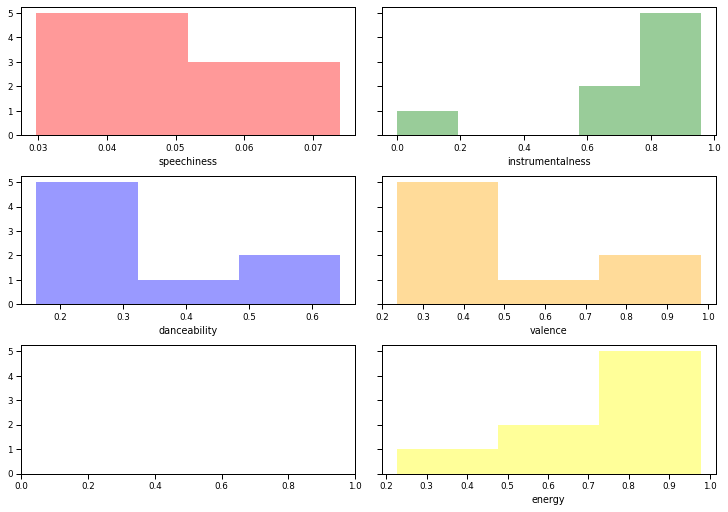

In [32]:
dirty_beaches_audio = dist_by_artist("Dirty Beaches")
dirty_beaches_audio[features].describe()

#### Observation: Mistaken instrumentalness score
None of the songs by Dirty Beaches are instrumental, in fact they rely very heavily on vocals. The genre they belong to, and their style, involves heavy distortion. Spotify is unable to identify the vocal aspect of these tracks and gives a mean score of 0.752895 on its instrumentalitness, a clear mistake.

The valence score is always a very subjective. Considering a great deal of the band's appeal is catchy, bittersweet nostalgia the mean valence score of 0.479875 seems resonable.

In [33]:
genres_by_artist_id("7JRs0G0kHZTBs0Lo7qOjL8")

['experimental pop', 'nu gaze', 'one-person band', 'quebec indie']

### The Tanya Tagaq case

,speechiness,instrumentalness,danceability,valence,energy
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.141330,0.285285,0.394900,0.202740,0.548010
std,0.106301,0.347010,0.172933,0.184946,0.247797
min,0.030400,0.000000,0.208000,0.034700,0.085100
25%,0.066525,0.003713,0.229750,0.065875,0.423250
50%,0.124500,0.057350,0.373500,0.142300,0.592000
75%,0.194250,0.618750,0.556500,0.247250,0.746500
max,0.377000,0.808000,0.619000,0.552000,0.840000


<Figure size 1080x720 with 0 Axes>

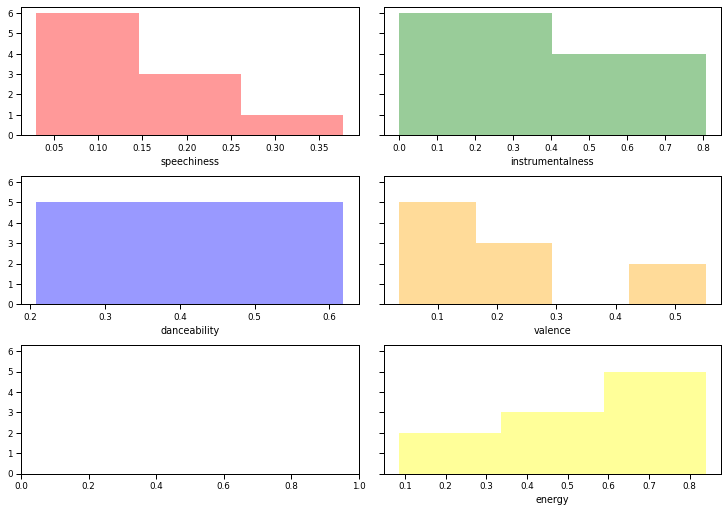

In [34]:
tanya_audio = dist_by_artist("Tanya Tagaq")
tanya_audio[features].describe()

#### Observation: Throat singing as instrument or as vocal content?
Tanya's work relies heavily on vocal singing and experimentation. Her vocal style is inspired by inuit traditional music, while including aspects of mainstream music composition, and mixing of genres like rap. Spotify hits or misses on considering this vocal aspect as an instrument, let's consider two of Tanya's songs: Aorta and Sulfur, two songs where the focus is put on throat singing. On the first case, Spotify doesn't consider these vocal sounds as instruments, with a score of 0.0108 on instrumentalness. On the second case, Sulfur holds a score of 0.717 on instrumentalness, a very high score.

In [64]:
aorta = audio_features_base[audio_features_base["id"]=="0UxLfXmjXU5qoRFL25n5lA"][features]
sulfur = audio_features_base[audio_features_base["id"]=="26jesSioQPPk52ETrFl0YY"][features]
fig = radar_from_df(aorta, "Tanya Tagaq's aorta")
fig.update_layout(title='Aorta vs Sulfur')
fig2 = radar_from_df(sulfur, "Tanya Tagaq's sulfur")
fig.add_trace(fig2.data[0])

## Conclusions

In this investigation we were able to find a few cases where Spotify's features are unable to detect technical aspects of experimental songs, nor were able to describe them accurately.
We have seen wrong classifications for most of the chosen features to analyze, and a few surprising results.


## Future work

Given the nature of the guiding question, there is a lot of ways this investigation can be expanded.

The dataset built presents a lot of interesting cases to analyse, and a first question to explore is methodological: which is the best way to do so?

It would prove fruitful to divide the dataset by artist, and analyse furthermore the average performance of Spotify's audio features by artist, given that we now have confirmed that it makes mistakes.

Another methodology that could present more information would be to separate by genre, popularity and other categories. Because the investigations necessarily mean qualitative analysis, this would be best done in teams or spaced out throughout time, since it is time intensive.

Finally, the investigation could be continued by reducing the question's scope, and to focus on a single feature to analyse in more depth.